In [17]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wg

## Initializing Enveloppe functions.

We study the case where the probability amplitudes of the photons are either shaped as a Gaussian or an exponential distribution as follows :

$$\alpha(z) = \frac{1}{\sqrt{\Delta z\sqrt{2\pi}}}\exp{\left(-\frac{z^2}{4\Delta z^2}\right)}e^{-ik_0z} \hspace{12pt} \textrm{or} \hspace{12pt} \alpha(z) = \sqrt{\gamma}\exp{\left(-\frac{\gamma}{2}z\right)}u(z)e^{-ik_0z}$$

$$\textrm{where} \hspace{12pt} \int_{-\infty}^{-\infty}|\alpha(z)|^2dz=\int_{-\infty}^{-\infty}|\tilde{\alpha}(k)|^2dk=1$$

One single photon represents a superposition of all the the possible k-modes, which means :

$$|\psi_1\rangle=\int\tilde{\alpha}(k)a^{\dag}(k)|\text{vac}\rangle dk$$

in the case of 2 spacial modes our input state is the following :

$$\mathrm{|\psi_{in}\rangle=\int\tilde{\alpha}_1(k)\tilde{\alpha}_2(k')a_{1}^{\dag}(k)a_{2}^{\dag}(k')|vac\rangle dk}$$

Generally speaking $\alpha_1(z)$ and $\alpha_2(z)$ can be any shape, in this simulation they will have the same shape with an added shift in space of value $z_0$. This adds a phase difference to the fourrier transforms, which means :
$$\mathrm{\alpha_2(z)=\alpha_1(z-z_0) \hspace{12pt} and \hspace{12pt} \tilde{\alpha}_2(k)=\tilde{\alpha}_1(k)e^{iz_0k}}$$

In [19]:
#Gaussian amplitude function (not exactly gaussian : |Gauss|^2 is gaussian)
def Gauss(m,sigma,x):
    G = (1/((sigma*(2*np.pi)**(1/2)))**(1/2))*np.exp(-((x-m)**2)/(4*sigma**2))
    return G

#Exponential amplitude function :
def Exp(gamma,m,x):
    E = np.sqrt(gamma)*np.exp(-gamma/2*(x-m))
    for i in range(len(x)):
        if x[i]<m :
            E[i]=0
    E = E/max(E)*np.sqrt(gamma)
    return E

#Lorentzian amplitude function :
def Lrz(gamma,m,x):
    L = np.sqrt(2*gamma/np.pi)/(gamma-2*1j*(x-m))
    return L

## HOM Dip Calculations
We assume an arbitrary unitary transformation in 2-mode space :
$$T=\begin{bmatrix} 
	A & B \\
	C & D 
	\end{bmatrix}$$

We are interested in calculating the probability of observing a single photon in each output mode :

$$\mathcal{P(|11\rangle)}=\langle11|\psi_{out}\rangle=\langle11|\mathcal{U}|\psi_{in}\rangle$$

After a series of calculations, we obtain the following result :

$$\mathcal{P(|11\rangle)}=|A|^2|D|^2 + |B|^2|C|^2 + 2\textrm{Re}(A^*D^*BC)\left|\int e^{-iz_0k}\left|\tilde{\alpha}_1(k)\right|^2dk\right|^2$$

We then plot this probability in function of the shift $z_0$.



Text(0.5, 1.0, 'HOM dip')

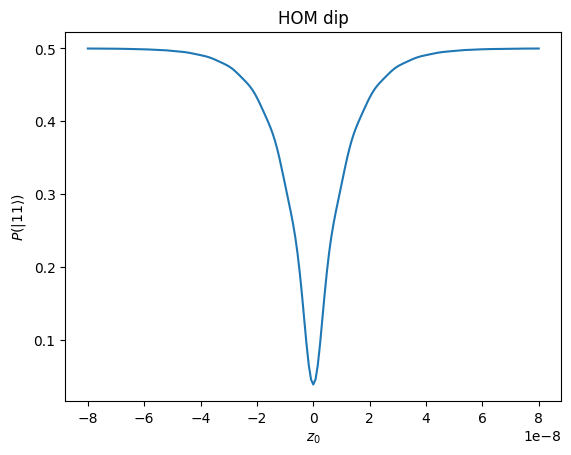

In [24]:
N=101
env_type = 2 # 1 = Gaussian, 2 = exponential (envelope in space)


if env_type == 1 :
    #Gaussian Parameters
    dz = 1e-8 #standard deviation in z
    lam = 500*1e-9 #wave length
    k0 = 2*np.pi/lam #mean k vector
    dk=1/(2*dz) #standard deviation in k 
    z = np.linspace(-13*dz, 13*dz,N)
    k = np.linspace(k0-13*dk, k0+13*dk, N)
    z0 = np.linspace(-8*dz, 8*dz, 201) # z0 : length of shift between photons
if env_type == 2 :
    #Lorentizian Parameters
    gamma = 1e8 #decaying factor in z
    lam = 500*1e-9 #wave length
    k0 = 2*np.pi/lam #mean k vector
    z = np.linspace(-13/gamma,13/gamma, N)
    k = np.linspace(k0-8*gamma,k0+8*gamma,N)
    z0 = np.linspace(-8/gamma, 8/gamma, 201) # z0 : length of shift between photons


# Beam splitter transfer matrix
BS=1/np.sqrt(2) * np.array([[1,-1],[1,1]])
A = BS[0,0]; B = BS[0,1]; C = BS[1,0]; D = BS[1,1]



dip = np.zeros(len(z0))
for i in range(len(z0)):
    if env_type == 1 :
        env1 = Gauss(0,dz,z)
        env2 = Gauss(z0[i],dz,z)
        env1_k = Gauss(k0,dk,k)
        env2_k = np.exp(1j*k*z0[i])*env1_k
    if env_type == 2 :
        env1 = Exp(gamma,0,z)
        env2 = Exp(gamma,z0[i],z)
        env1_k = Lrz(gamma,k0,k)
        env2_k = np.exp(1j*k*z0[i])*env1_k
        
    overlap = abs(sc.integrate.simps(env1_k*np.conj(env2_k),k))**2
    Pr11 = abs(A)**2*abs(D)**2 + abs(B)**2*abs(C)**2 + 2*np.real(np.conj(A)*np.conj(D)*B*C)*overlap 
    dip[i] = Pr11
    
plt.figure()
plt.plot(z0,dip)
plt.xlabel(r"$z_0$")
plt.ylabel(r"$P(|11\rangle)$")
plt.title("HOM dip")


Interactive display

In [25]:
def SHOW(Z0) :
    if env_type == 1 :
        i0=int(np.floor(((Z0+8)/16)*200)) #index of current point
        #Gaussian Parameters
        dz = 1e-8 #standard deviation in z
        Z0=Z0*dz # multiplied by dz because slider doesn't accept small values (slider goes from -8 to 8)
        lam = 500*1e-9 #wave length
        k0 = 2*np.pi/lam #mean k vector
        dk=1/(2*dz) #standard deviation in k 
        N=101
        z = np.linspace(-13*dz, 13*dz,N)
        k = np.linspace(-13*dk, 13*dk, N)
        z0 = np.linspace(-8*dz, 8*dz, 201) # z0 : length of shift between photons
        env1 = Gauss(0,dz,z)
        env2 = Gauss(Z0,dz,z)
        env1_k = Gauss(k0,dk,k)
        env2_k = np.exp(1j*k*Z0)*env1_k
    if env_type == 2 :
        i0=int(np.floor(((Z0+8)/16)*200)) #index of current point
        #Lorentizian Parameters
        N=101
        gamma = 1e8 #decaying factor in z
        Z0=Z0/gamma
        lam = 500*1e-9 #wave length
        k0 = 2*np.pi/lam #mean k vector
        z = np.linspace(-13/gamma,13/gamma, N)
        k = np.linspace(k0-8*gamma,k0+8*gamma,N)
        z0 = np.linspace(-8/gamma, 8/gamma, 201) # z0 : length of shift between photons

        env1 = Exp(gamma,0,z)
        env2 = Exp(gamma,Z0,z)
        env1_k = Lrz(gamma,k0,k)
        env2_k = np.exp(1j*k*Z0)*env1_k

    #plot photon probability amplitudes
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.plot(z,abs(env1)**2)
    plt.plot(z,abs(env2)**2)
    plt.fill_between(z, abs(env2)**2, color='cyan',alpha=0.2)
    plt.fill_between(z, abs(env2)**2, abs(env1)**2, color='white')
    if env_type==1:
        plt.xlim(-8*dz,8*dz)
    if env_type==2:
        plt.xlim(-8/gamma,8/gamma)
    plt.xlabel("z")
    plt.ylabel(r"$|\alpha(z)|^2$")
    plt.title("Probability distributions for each photon in space")
    #plot HOM dip
    plt.subplot(1,2,2)
    plt.plot(z0,dip)
    plt.xlabel(r"$z_0$")
    plt.ylabel(r"$P(|11\rangle)$")
    plt.title("HOM dip")
    
    plt.plot(Z0,dip[i0],marker='o',markersize=6)
Z0=0
Z0_slide = wg.FloatSlider(value=Z0,min=-8,max=8,step=16/200)
wg.interact(SHOW, Z0=Z0_slide)


interactive(children=(FloatSlider(value=0.0, description='Z0', max=8.0, min=-8.0, step=0.08), Output()), _dom_…

<function __main__.SHOW(Z0)>